# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

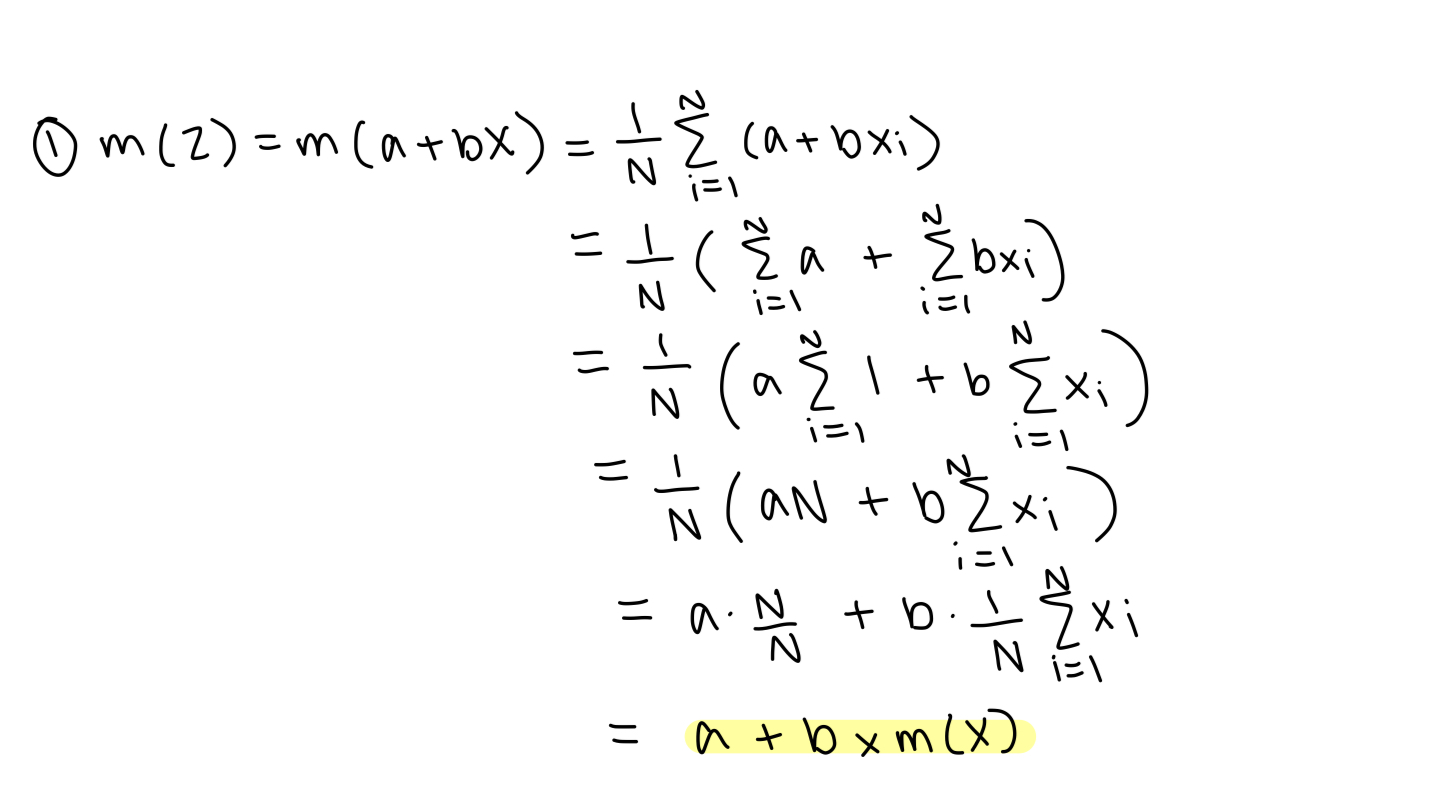

In [6]:
from IPython.display import Image

Image(filename='/Users/vaneeshagupta/DS3001/EDA/q1.jpg', width=800, height=600)

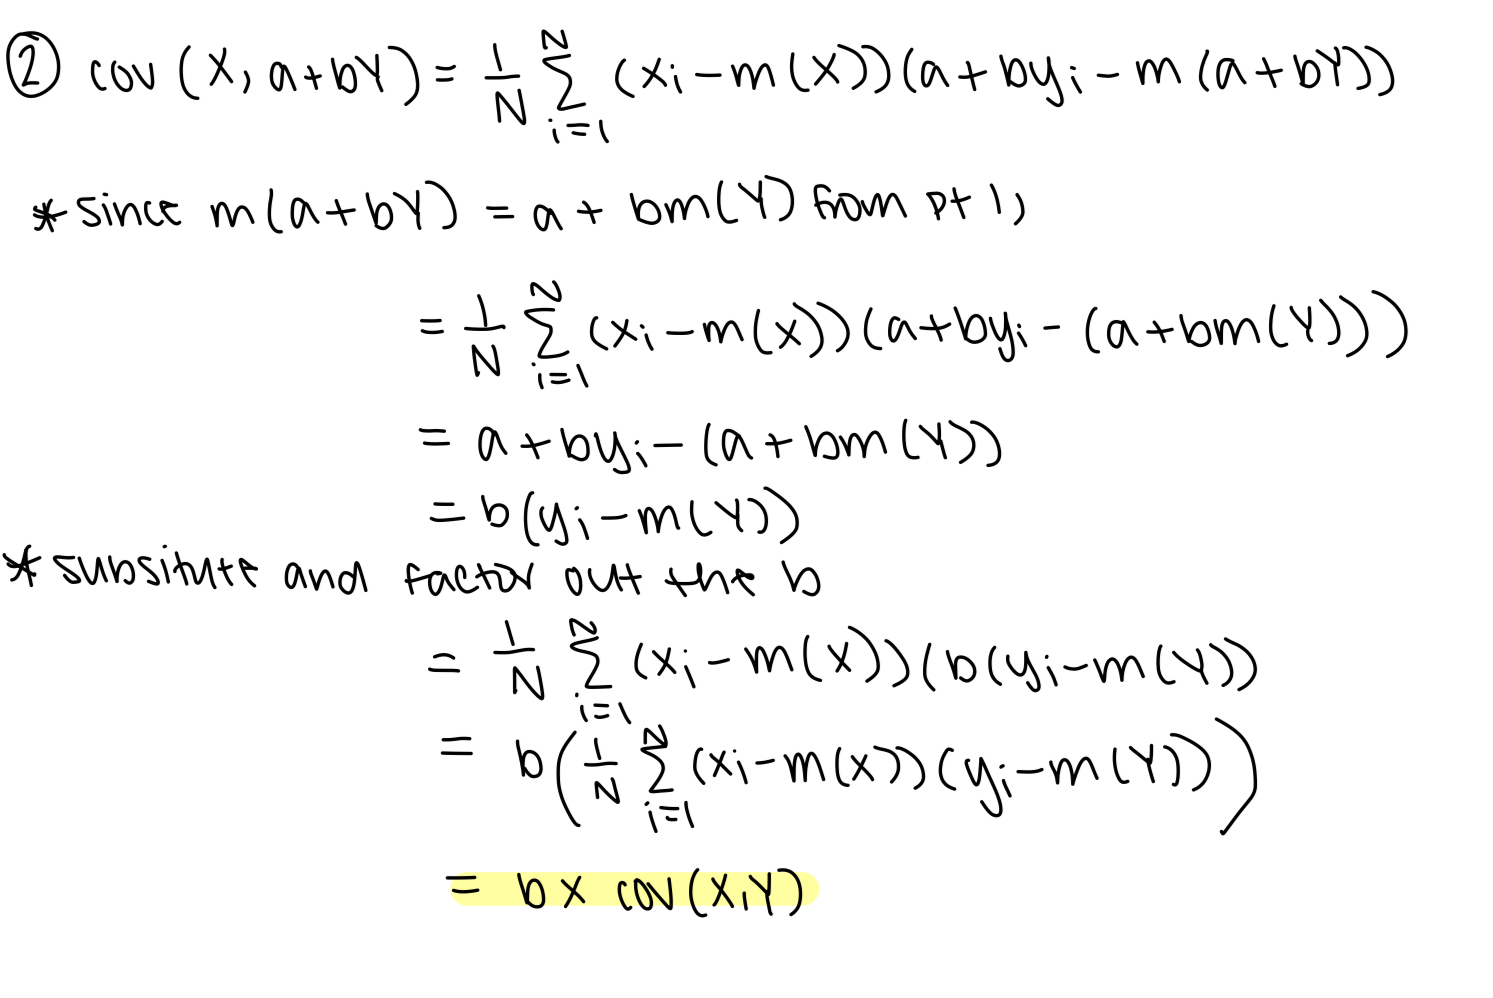

In [7]:
Image(filename='/Users/vaneeshagupta/DS3001/EDA/q2.jpg', width=800, height=600)

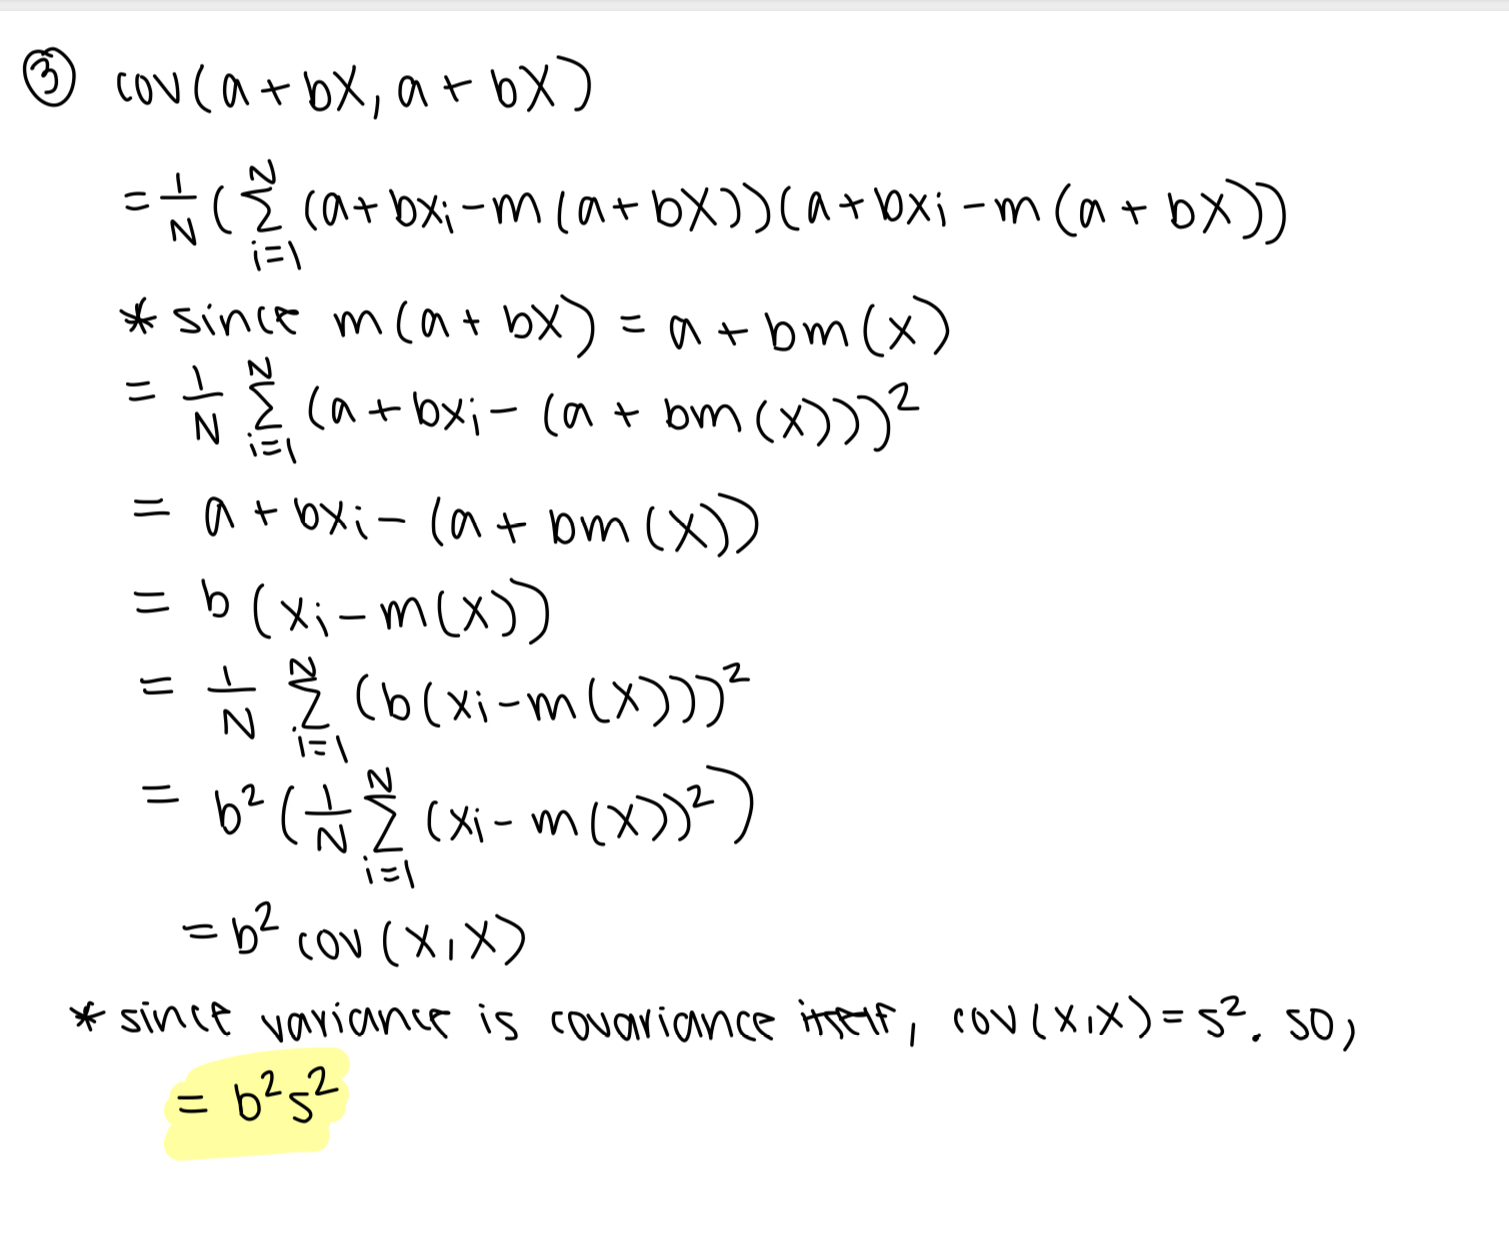

In [8]:
Image(filename='/Users/vaneeshagupta/DS3001/EDA/q3.jpg', width=800, height=600)

4. A non-decreasing transformation of the median is the median of the transformed variable since a non-decreasing transformation will preserve the order of the observations. Thus, this property will also hold for quantile since the relative ranks of data points are preserved. The IQR will be transformed because this is equivalent to Q3-Q1 and this subtraction might not necessarily preserve the order. It might also not apply to range because after the transformation, the distance between the maxiumum and minimum might change.

5. This is not always true because the transformation g() might not be linear and so that would change the values and distort the distribution. Thus, that would not be equal to the mean of the transformation which depends on the values. This could be true for linear transformations though.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [10]:
#1
import pandas as pd
data = pd.read_csv('./data/ForeignGifts_edu.csv')


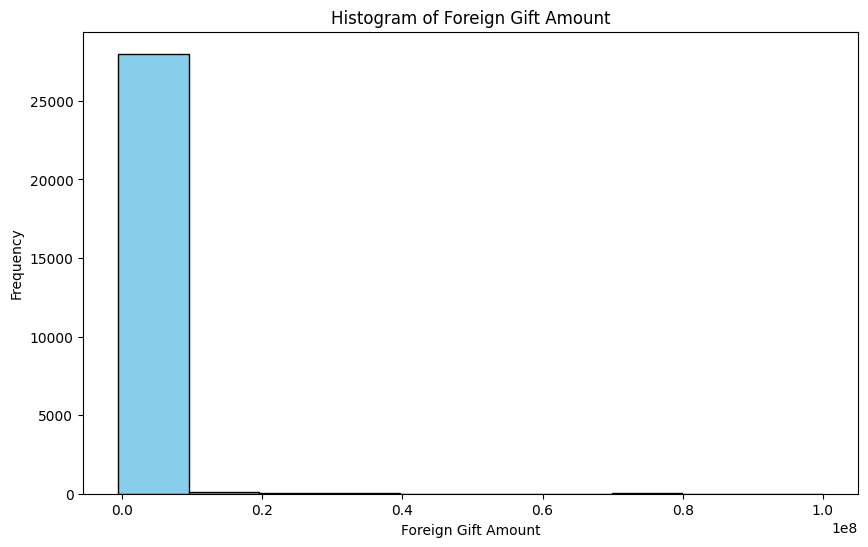

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64
There are 28,221 foreign gifts and the mean amount is $588,232. The standard deviation is pretty high ($3,222,011), indicating that there is high variability in the gift amounts.


In [17]:
#2

import matplotlib.pyplot as plt

#Histogram for Foreign Gift Amount
plt.figure(figsize=(10, 6))
plt.hist(data['Foreign Gift Amount'], color='skyblue', edgecolor='black')
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()

# Describing the variable
print(data['Foreign Gift Amount'].describe())

print("There are 28,221 foreign gifts and the mean amount is $588,232. The standard deviation is pretty high ($3,222,011), indicating that there is high variability in the gift amounts.")


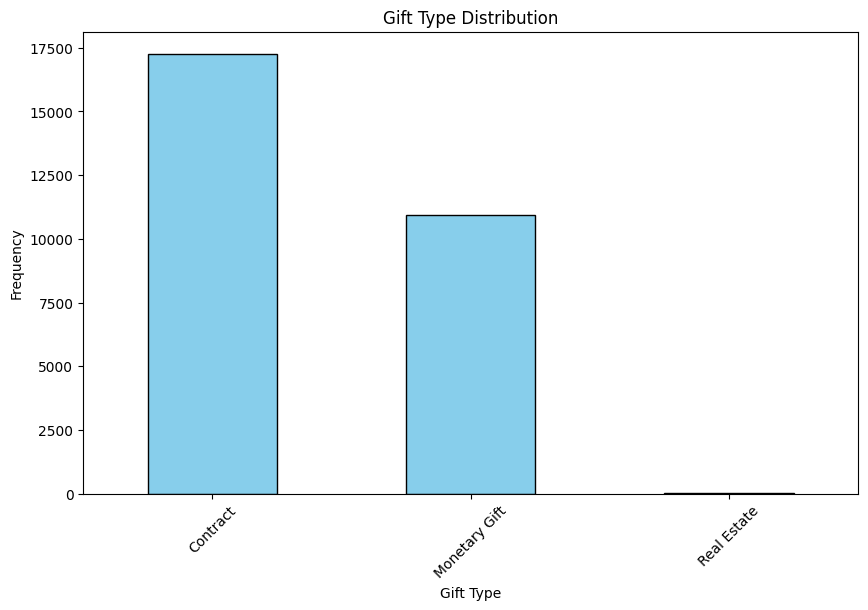

Proportions: 


Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64

In [18]:
#3

# Value counts for Gift Type
gift_type_counts = data['Gift Type'].value_counts()

# Histogram for Gift Type
gift_type_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Gift Type Distribution')
plt.xlabel('Gift Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Proportion of gift types
print ("Proportions: ")
gift_type_proportions = gift_type_counts / gift_type_counts.sum()
gift_type_proportions


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/zr/fb7f6x8n33dfsp92rr2qp16c0000gn/T/ipykernel_29820/1846093756.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['log_Foreign Gift Amount'], shade=True, color='skyblue')


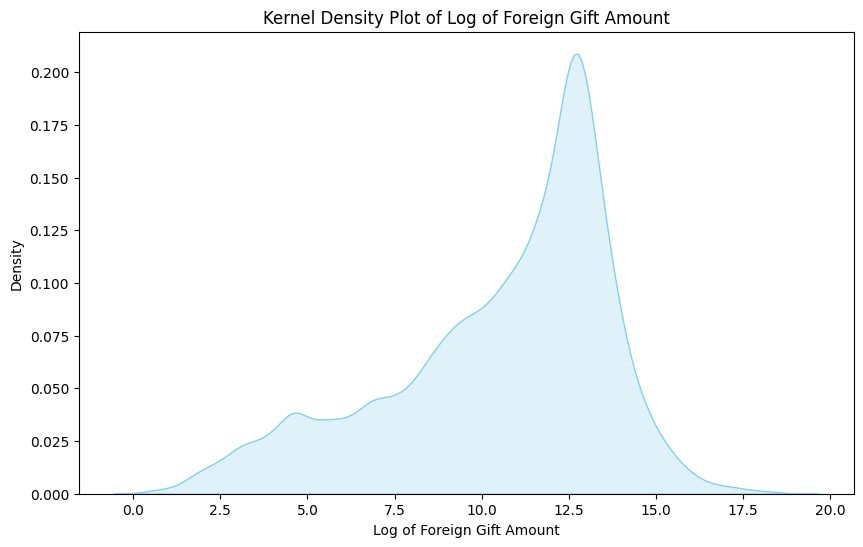

/var/folders/zr/fb7f6x8n33dfsp92rr2qp16c0000gn/T/ipykernel_29820/1846093756.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='log_Foreign Gift Amount', hue='Gift Type', shade=True)


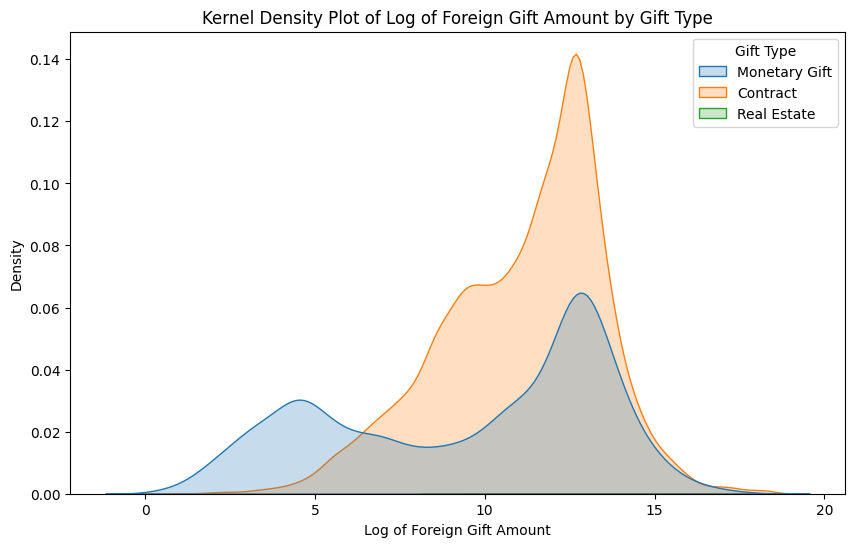

Some patterns I notice are that the contracts have a strong peak, indicating that most contract gifts are pretty large amounts. I also notice that Monetary gifts have a wider distribution, meaning the amounts are more varied. I also notice that real estate gifts are infrequent.


In [34]:
#4
import seaborn as sns
import numpy as np

# Kernel Density Plot for log of Foreign Gift Amount
data['log_Foreign Gift Amount'] = np.log1p(data['Foreign Gift Amount'])

plt.figure(figsize=(10, 6))
sns.kdeplot(data['log_Foreign Gift Amount'], shade=True, color='skyblue')
plt.title('Kernel Density Plot of Log of Foreign Gift Amount')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

# Conditional Kernel Density Plot by Gift Type
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='log_Foreign Gift Amount', hue='Gift Type', shade=True)
plt.title('Kernel Density Plot of Log of Foreign Gift Amount by Gift Type')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

print("Some patterns I notice are that the contracts have a strong peak, indicating that most contract gifts are pretty large amounts. I also notice that Monetary gifts have a wider distribution, meaning the amounts are more varied. I also notice that real estate gifts are infrequent.")

In [26]:
# 5. 

# Top 15 countries by number of gifts
top_countries_count = data.groupby('Country of Giftor')['Foreign Gift Amount'].count().sort_values(ascending=False).head(15)
print('Top 15 countries by number of gifts:')
print(top_countries_count)

# Top 15 countries by total amount given
top_countries_amount = data.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print('Top 15 countries by total amount given:')
print(top_countries_amount)


Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64
Top 15 countries by total amount given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                4011576

Top 15 institutions by total amount received:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int

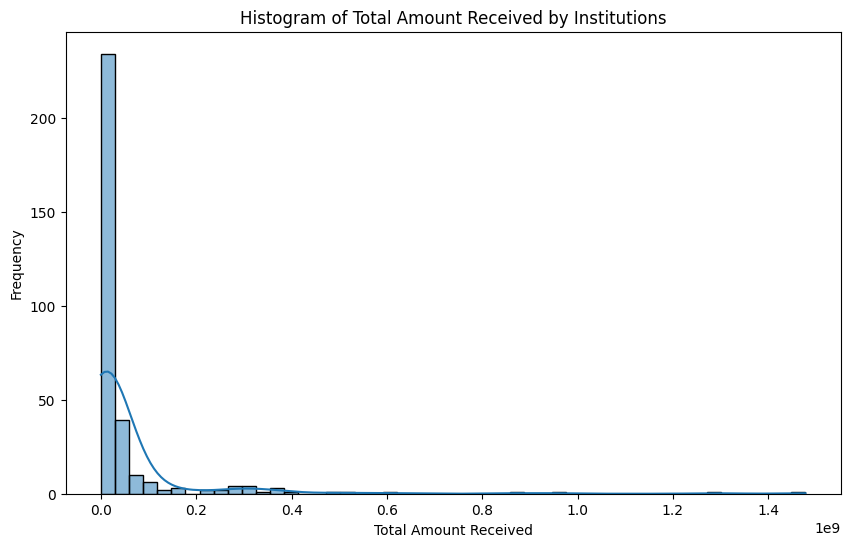

In [28]:
#6

#Top 15 institutions by total amount received
top_institutions = data.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print('Top 15 institutions by total amount received:')
print(top_institutions)

# Histogram of total amount received by all institutions
total_received = data.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(10, 6))
sns.histplot(total_received, bins=50, kde=True)
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount Received')
plt.ylabel('Frequency')
plt.show()

In [33]:
#7
top_giftors = data.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(5)
print('Top giftors by total amount given:')
print(top_giftors)

Top giftors by total amount given:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [39]:
#1
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data and examining it
df = pd.read_csv('./data/drilling_rigs.csv')

# Checking the first few rows and get info about the dataframe
print(df.head().to_string(index=False))
print(df.info())

# Checking for any missing values
print(df.isnull().sum())

print("""
There are 623 observations and 10 variables in the dataset.
The numeric variables are not all correctly read by Pandas, as some are marked as 'object' instead of numeric types. 
      
The columns that need to be typecast/coerced are:

- Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)
- Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)
- Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)
- Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)
- Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)
- Active Well Service Rig Count (Number of Rigs)
      
In order to clean this data we will need to convert the columns that should be numeric to the correct data type using pd.to_numeric(). We will then need to handle any invalid data or "Not Available" values by either replacing them with NaN or coercing errors to NaN.
    
""")


        Month  Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs) Crude Oil Rotary Rigs in Operation, Total (Number of Rigs) Natural Gas Rotary Rigs in Operation, Total (Number of Rigs) Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs) Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs) Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)  Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs) Active Well Service Rig Count (Number of Rigs)
 1973 January                                                                          1120                                                                             99                                              Not Available                                                Not Available                        

In [41]:
#Data Cleaning

# Converting columns with numeric values stored as 'object' to numeric, coercing errors to NaN
df['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(
    df['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce'
)
df['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(
    df['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce'
)
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'] = pd.to_numeric(
    df['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'], errors='coerce'
)
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'] = pd.to_numeric(
    df['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'], errors='coerce'
)
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'] = pd.to_numeric(
    df['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'], errors='coerce'
)
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'
)

# Checking the data types after conversion
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Month                                                                                        623 non-null    object 
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64  
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64  
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   448 non-null    float64
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 448 non-null    float64
 5   Crude Oil and Natural Gas Rotary Rig

In [48]:
#2
df['time'] = pd.to_datetime(df['Month'], format='mixed')
print(df['time'].head())


0   1973-01-01
1   1973-02-01
2   1973-03-01
3   1973-04-01
4   1973-05-01
Name: time, dtype: datetime64[ns]


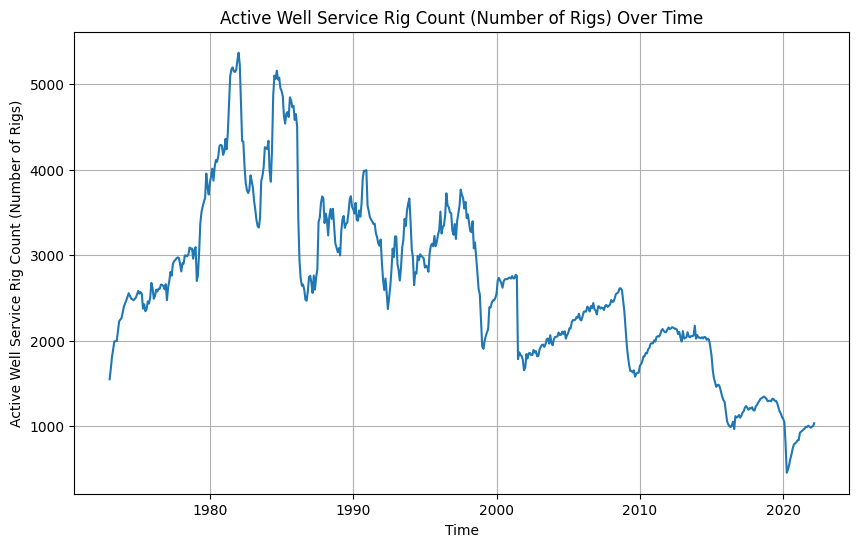

I can see that over time, the active well service rig count (number of rigs) has decreased over time with the lowest being in 2020.


In [44]:
#3
plt.figure(figsize=(10,6))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'])
plt.title('Active Well Service Rig Count (Number of Rigs) Over Time')
plt.xlabel('Time')
plt.ylabel('Active Well Service Rig Count (Number of Rigs)')
plt.grid(True)
plt.show()

print("I can see that over time, the active well service rig count (number of rigs) has decreased over time with the lowest being in 2020.")

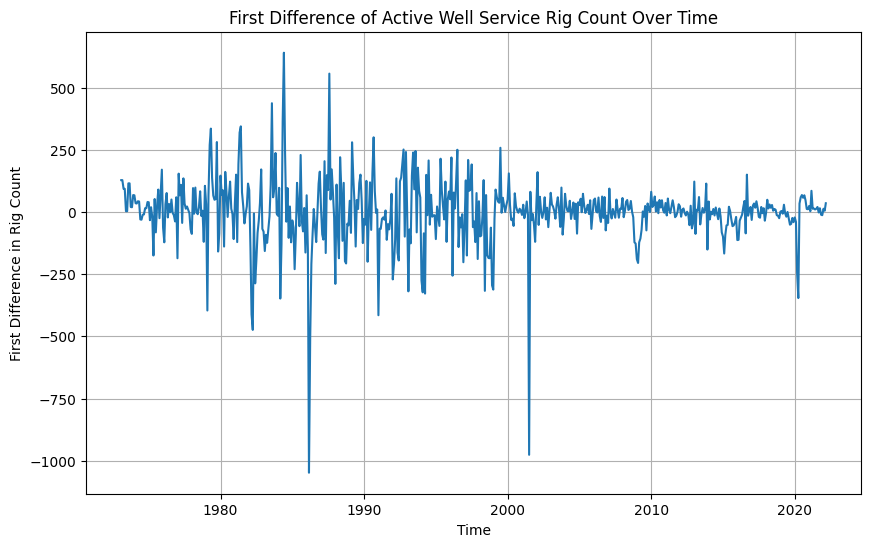

I can see that there are fluctuating changes over time with some peaks (Ex. little after 1980) and troughs (Ex. near 1986, 2001, and 2020). Also, the fluctuations are larger at the start of the graph.


In [49]:
#4
df['Rig Count First Difference'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(10,6))
plt.plot(df['time'], df['Rig Count First Difference'])
plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('First Difference in Rig Count')
plt.grid(True)
plt.show()

print("I can see that there are fluctuating changes over time with some peaks (Ex. little after 1980) and troughs (Ex. near 1986, 2001, and 2020). Also, the fluctuations are larger at the start of the graph.")

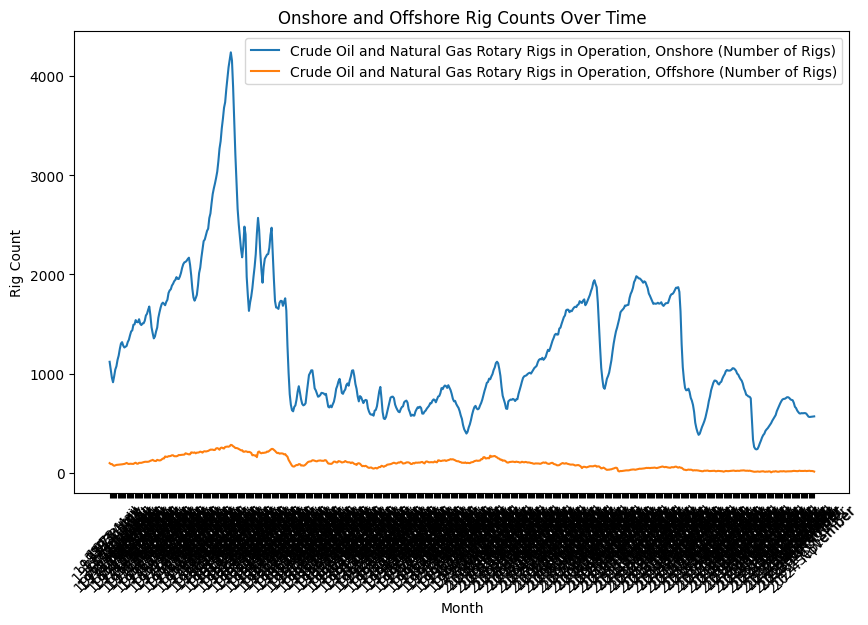

In [47]:
#5
import matplotlib.pyplot as plt

df_melted = pd.melt(df, id_vars=['Month'], 
                    value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 
                                'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'], 
                    var_name='Rig Type', value_name='Rig Count')

plt.figure(figsize=(10,6))
for rig_type in df_melted['Rig Type'].unique():
    subset = df_melted[df_melted['Rig Type'] == rig_type]
    plt.plot(subset['Month'], subset['Rig Count'], label=rig_type)

plt.xlabel('Month')
plt.ylabel('Rig Count')
plt.title('Onshore and Offshore Rig Counts Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()
